# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [8]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [7]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (7.9324668195462635, 0.018944655672798905)
1      (2.785347956896783, 0.24841017230612533)
2     (0.12655248071419922, 0.9386841354301608)
3      (0.6289035236439656, 0.7301890820864017)
4      (4.415835815416615, 0.10992929333738985)
dtype: object

#### Interpret the normaltest results and make your observations.

In [ ]:
# Cuando el valor de p cuando está por debajo de un nivel de
# significancia de 0.05, se puede afirmar que los datos no siguen unna distribución normal y se
# rechaza la hipótesis nula.
# En los casos en los que p son mayores a 0.05, no se puede afirmar que 
# los datos no sigan una distribución normal.

# El estadístico cuando más se aproxima a cero la distribución tiende a ser normal.

# Por ejemplo para una muestra de 500, el valor de p es 0.7 (mayor que 0.05) y el estadístico
# se acerca a 0 por lo que la distribución tiende a ser normal.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

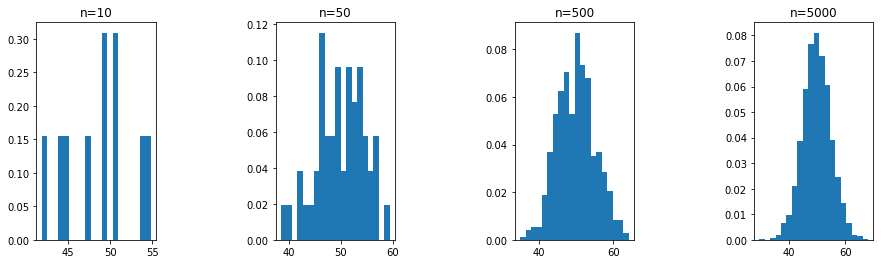

In [113]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Según el Teorema del Límite Central cuando la muestra es lo suficiente grande la distribución 
# de las medias sigue una distribución normal. Por ese motivo, conforme n es mayor los plots nos
# muestran una distribución más homogénea.



# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

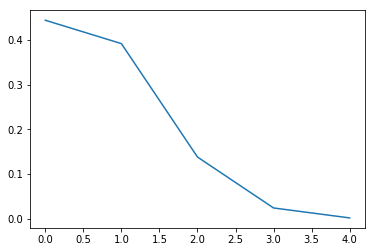

In [12]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# De una muestra de 5 personas, la probabilidad de que clickeen en el anuncio 
# se va reduciendo conforme aumenta la muestra. Que 4 personas clickeen es casi nula.


#### Now plot PMP with 50, 500, and 5000 visitors.

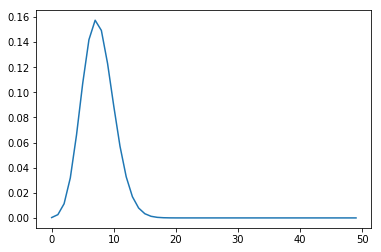

In [13]:
from scipy.stats import binom

n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

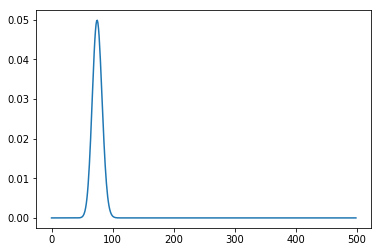

In [14]:
from scipy.stats import binom

n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()


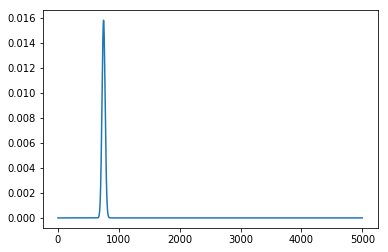

In [15]:
from scipy.stats import binom

n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Conforme la muestra es mayor, los valores se acercan más a la media, están más concentrados
# y son más homogéneos. 


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Según lo que he entendido, la distribución de de Poisson mide la probabilidad de que ocurra
# un determinado número de eventos durante un determinado período de tiempo.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [12]:
from scipy.stats import poisson

mu = 300
prob = poisson.cdf(320, mu)
print(prob)

0.8809955143948803


#### What is the probability of getting 60 visits?

In [11]:
mu = 300
prob = poisson.cdf(60, mu)
print(prob)

3.275053111798523e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

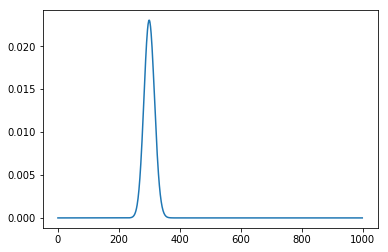

In [18]:
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)